# Data Modelling
***

### Classification Problem Algorithm:
#### Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

from scipy.stats import uniform

from sklearn.model_selection import RandomizedSearchCV

In [4]:
df = pd.read_csv('diabetes_encoded.csv')

In [5]:
df.set_index('encounter_id', inplace=True)
y = df['readmitted']
X = df.drop('readmitted', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
from collections import Counter
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
print('Original training dataset shape {}'.format(Counter(y_train)))
print('Original testing dataset shape {}'.format(Counter(y_test)))

Original training dataset shape Counter({0: 43912, 1: 37500})
Original testing dataset shape Counter({0: 10952, 1: 9402})


In [7]:
from sklearn.dummy import DummyClassifier
# Train Dummy Classifier
baseline_model = DummyClassifier(strategy='most_frequent')
baseline_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [8]:
# Predict and evaluate Dummy Classifier
y_pred_base = baseline_model.predict(X_test)
base_accuracy = accuracy_score(y_test, y_pred_base)
print(f'Baseline Model Accuracy (Most Frequent Class): {base_accuracy}')

base_precision = precision_score(y_test, y_pred_base, average='binary')
base_recall = recall_score(y_test, y_pred_base, average='binary')
base_f1 = f1_score(y_test, y_pred_base, average='binary')

print(f'Baseline Model Precision: {base_precision}')
print(f'Baseline Model Recall: {base_recall}')
print(f'Baseline Model F1 Score: {base_f1}')

print(y.value_counts())

Baseline Model Accuracy (Most Frequent Class): 0.5380760538469097
Baseline Model Precision: 0.0
Baseline Model Recall: 0.0
Baseline Model F1 Score: 0.0
readmitted
0    54864
1    46902
Name: count, dtype: int64


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [9]:
# handle class imbalance
# Initialize SMOTE and baseline model
smote = SMOTE(random_state=42)
baseline_model_smote = DummyClassifier(strategy='most_frequent')

# Create pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('classifier', baseline_model_smote)
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict and evaluate Dummy Classifier
y_pred_base_smote = pipeline.predict(X_test)
base_accuracy_smote = accuracy_score(y_test, y_pred_base_smote)
print(f'Baseline Model Accuracy (Most Frequent Class) with SMOTE: {base_accuracy_smote}')

base_precision_smote = precision_score(y_test, y_pred_base_smote, average='binary')
base_recall_smote = recall_score(y_test, y_pred_base_smote, average='binary')
base_f1_smote = f1_score(y_test, y_pred_base_smote, average='binary')

print(f'Baseline Model Precision with SMOTE: {base_precision_smote}')
print(f'Baseline Model Recall with SMOTE: {base_recall_smote}')
print(f'Baseline Model F1 Score with SMOTE: {base_f1_smote}')

print(y.value_counts())

Baseline Model Accuracy (Most Frequent Class) with SMOTE: 0.5380760538469097
Baseline Model Precision with SMOTE: 0.0
Baseline Model Recall with SMOTE: 0.0
Baseline Model F1 Score with SMOTE: 0.0
readmitted
0    54864
1    46902
Name: count, dtype: int64


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Predict and evaluate the standard metrics
y_pred_logistic = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_logistic)
log_precision = precision_score(y_test, y_pred_logistic, average='binary')
log_recall = recall_score(y_test, y_pred_logistic, average='binary')
log_f1 = f1_score(y_test, y_pred_logistic, average='binary')
log_auc = roc_auc_score(y_test, y_pred_logistic)

print(f'Logistic Regression Accuracy: {log_accuracy}')
print(f'Logistic Regression Precision: {log_precision}')
print(f'Logistic Regression Recall: {log_recall}')
print(f'Logistic Regression F1 Score: {log_f1}')
print(f'Logistic Regression AUC: {log_auc}')

Logistic Regression Accuracy: 0.5372899675739412
Logistic Regression Precision: 0.4976261127596439
Logistic Regression Recall: 0.17836630504148054
Logistic Regression F1 Score: 0.2626056999686815
Logistic Regression AUC: 0.5118913336748674


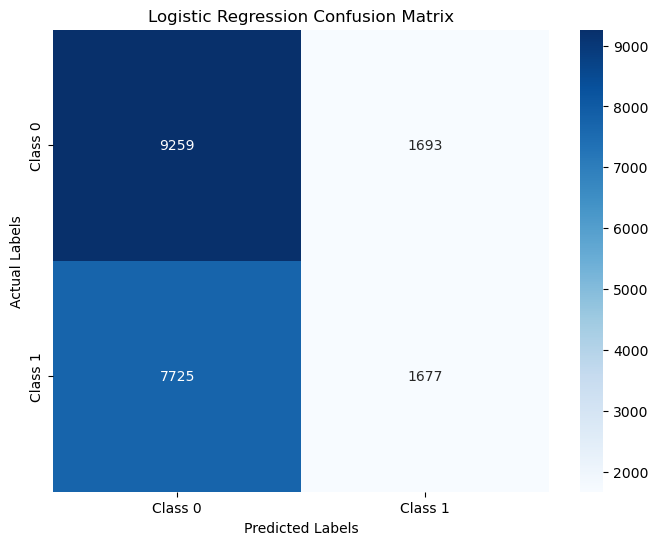

In [12]:
# compute the confusion matrix
log_cm = confusion_matrix(y_test, y_pred_logistic)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('LRbeforeHT.png', dpi=300)
plt.show()


Scaling the data using a standard scaler to see if any improvement

In [14]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train the model
log_model_scaled = LogisticRegression(max_iter=1000)
log_model_scaled.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_scaled = log_model_scaled.predict(X_test_scaled)
log_accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f'Logistic Regression Accuracy: {log_accuracy}')
print(f'Logistic Regression Accuracy after scaling: {log_accuracy_scaled}')

Logistic Regression Accuracy: 0.5372899675739412
Logistic Regression Accuracy after scaling: 0.6250859781861059


In [15]:
# Cross-Validation
scores = cross_val_score(log_model_scaled, X, y, cv=5, scoring='accuracy')
print(f'Cross-Validation Scores: {scores}')
print(f'Average Cross-Validation Accuracy: {scores.mean()}')

Cross-Validation Scores: [0.55497691 0.53839729 0.54188572 0.54503022 0.49290031]
Average Cross-Validation Accuracy: 0.5346380879780994


Model Optimisation

Randomly sample a fraction of the dataset. This is particularly useful for faster model training and hyperparameter tuning.

In [18]:
# Sample a fraction (e.g., 10%) of the dataset
subset = df.sample(frac=0.05, random_state=42)  # 10% of the data

# Split the subset into features and target
X_subset = subset.drop('readmitted', axis=1)  # Replace 'target' with your target column
y_subset = subset['readmitted']

In [19]:
# Split data
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_subset, y_subset, train_size=0.8, random_state=42)
print('Sample training dataset shape {}'.format(Counter(y_train_sample)))
print('Sample testing dataset shape {}'.format(Counter(y_test_sample)))

Sample training dataset shape Counter({0: 2167, 1: 1903})
Sample testing dataset shape Counter({0: 552, 1: 466})


In [20]:
# Randomized Search for Hyperparameters
param_distributions = {
    'C': uniform(0.001, 10-0.001), # Regularization strength
    'penalty': ['l1', 'l2'], # Regularization type
    'solver': ['liblinear', 'saga'], # Solver
    'max_iter': [1000, 1500, 2000] # Maximum number of iterations
}

random_search = RandomizedSearchCV(
    estimator=log_model_scaled, 
    param_distributions=param_distributions,
    n_iter=10, # Number of parameter settings to sample 
    cv=5, # Number of folds in cross-validation 
    scoring='accuracy', # Metric to optimize
    verbose=1, # Verbosity level
    random_state=42 # For reproducibility
)
# Fit RandomizedSearchCV
random_search.fit(X_train_sample, y_train_sample)
# Print best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\3sthe\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

Best parameters: {'C': 3.7460266483547775, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.6127764127764127


In [21]:
# Train the final model
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the final model
y_pred_final = best_model.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
conf_matrix_final = confusion_matrix(y_test, y_pred_final)
class_report_final = classification_report(y_test, y_pred_final)

print(f'Optimised Accuracy: {accuracy_final}')
print('Optimised Confusion Matrix:')
print(conf_matrix_final)
print('Optimised Classification Report:')
print(class_report_final)

Optimised Accuracy: 0.6248894566178638
Optimised Confusion Matrix:
[[8534 2418]
 [5217 4185]]
Optimised Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69     10952
           1       0.63      0.45      0.52      9402

    accuracy                           0.62     20354
   macro avg       0.63      0.61      0.61     20354
weighted avg       0.63      0.62      0.61     20354



In [22]:
# compare with original model
print(f'Logistic Regression Accuracy after scaling: {log_accuracy_scaled}')
log_cm = confusion_matrix(y_test, y_pred_logistic)
print('Original Confusion Matrix:')
print(log_cm)
class_report = classification_report(y_test, y_pred_scaled)
print('Original Classification Report:')
print(class_report)

Logistic Regression Accuracy after scaling: 0.6250859781861059
Original Confusion Matrix:
[[9259 1693]
 [7725 1677]]
Original Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.78      0.69     10952
           1       0.63      0.45      0.52      9402

    accuracy                           0.63     20354
   macro avg       0.63      0.61      0.61     20354
weighted avg       0.63      0.63      0.61     20354



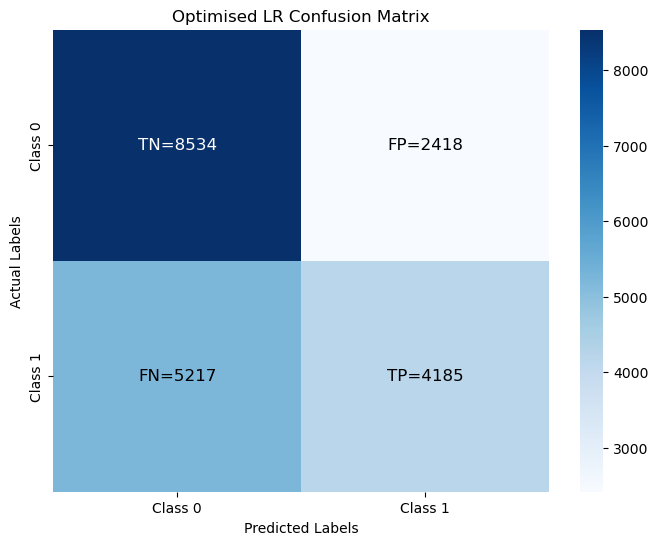

In [52]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_final, fmt='d', cmap='Blues', annot_kws={"size": 16},
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Optimised LR Confusion Matrix')
# Add text annotations for TP, TN, FP, FN
plt.text(0.5, 0.5, 'TN={}'.format(conf_matrix_final[0, 0]), ha='center', va='center', color='white', fontsize=12)
plt.text(1.5, 0.5, 'FP={}'.format(conf_matrix_final[0, 1]), ha='center', va='center', color='black', fontsize=12)
plt.text(0.5, 1.5, 'FN={}'.format(conf_matrix_final[1, 0]), ha='center', va='center', color='black', fontsize=12)
plt.text(1.5, 1.5, 'TP={}'.format(conf_matrix_final[1, 1]), ha='center', va='center', color='black', fontsize=12)
plt.savefig('LRafterHT.png', dpi=300)
plt.show()

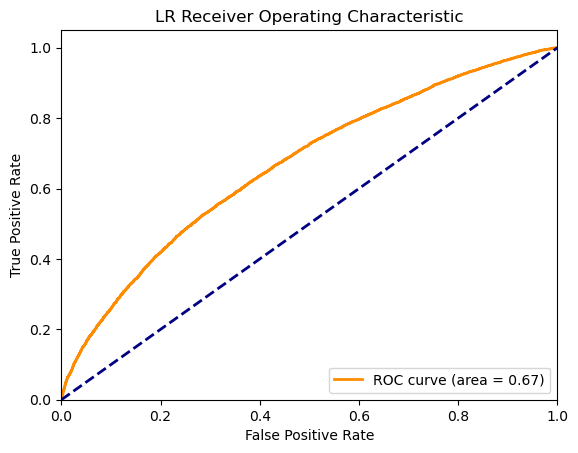

In [83]:
# Compute ROC curve and AUC for best model
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('LR_ROC.png', dpi=300)
plt.show()